<a href="https://colab.research.google.com/github/LambdaTheda/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/11pm_Copy_of_DS_Unit_1_Sprint_Challenge_1_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 1 - Load and Explore the Data

Run the cell below to load the datasets into three dataframes and then follow the instructions below


In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

geo_country_codes = geo_country_codes[['geo','country']]

In [2]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


Check for missing/null values in the three dataframes

In [3]:
# Your Work Here
pd.isnull(cell_phones)

,geo,time,cell_phones_total
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
9210,False,False,False
9211,False,False,False
9212,False,False,False
9213,False,False,False


Make a scatter plot from the `cell_phones` dataframe plotting "time" against "cell_phones_total"

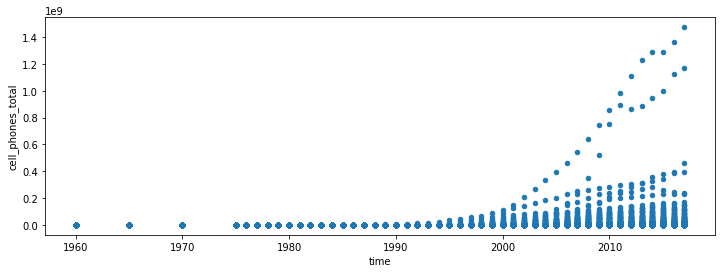

In [4]:
# Your Work Here
import matplotlib.pyplot as plt
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')
cell_phones.plot(kind = 'scatter', x='time', y='cell_phones_total', figsize=(12,4))

### Part 2 - Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [5]:
# Your Work Here
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

merged_cell_phones_and_pop_df = pd.merge(cell_phones, population, how='inner',  on= ['geo','time']) # merge dfs where geo and time are the same; intersection
merged_cell_phones_and_pop_df.shape

(8590, 4)

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [6]:
# Your Work Here
geo_and_country_cols_merged_df = pd.merge(merged_cell_phones_and_pop_df, geo_country_codes)
geo_and_country_cols_merged_df.shape

(8590, 5)

### Part 3 - Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [7]:
# Your Work Here 

# using df.assign():
phones_per_person_new_appended_col = merged_cell_phones_and_pop_df.assign(phones_per_person = lambda merged_cell_phones_and_pop_df: merged_cell_phones_and_pop_df['cell_phones_total'] / merged_cell_phones_and_pop_df['population_total'])
   
phones_per_person_new_appended_col # call new df with appended col



,geo,time,cell_phones_total,population_total,phones_per_person
0,afg,1960,0.0,8996351,0.000000
1,afg,1965,0.0,9938414,0.000000
2,afg,1970,0.0,11126123,0.000000
3,afg,1975,0.0,12590286,0.000000
4,afg,1976,0.0,12840299,0.000000
...,...,...,...,...,...
8585,zwe,2013,13633167.0,15054506,0.905587
8586,zwe,2014,11798652.0,15411675,0.765566
8587,zwe,2015,12757410.0,15777451,0.808585
8588,zwe,2016,12878926.0,16150362,0.797439


### Part 4 - Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [8]:
# Your Work Here
print(phones_per_person_new_appended_col.describe())

non_num_descrp_df = phones_per_person_new_appended_col.groupby(by="geo") #new df grpd by country
non_num_descrp_df.describe()

              time  cell_phones_total  population_total  phones_per_person
count  8590.000000       8.590000e+03      8.590000e+03        8590.000000
mean   1994.193481       9.004950e+06      2.983823e+07           0.279639
std      14.257975       5.573408e+07      1.161284e+08           0.454247
min    1960.000000       0.000000e+00      4.433000e+03           0.000000
25%    1983.000000       0.000000e+00      1.456148e+06           0.000000
50%    1995.000000       6.200000e+03      5.725062e+06           0.001564
75%    2006.000000       1.697652e+06      1.810581e+07           0.461149
max    2017.000000       1.474097e+09      1.409517e+09           2.490243


time                          ... phones_per_person                    
    count         mean        std  ...               50%       75%       max
geo                                ...                                      
afg  46.0  1993.978261  14.427580  ...          0.000000  0.084968  0.673506
ago  46.0  1993.978261  14.427580  ...          0.000136  0.133665  0.522003
alb  46.0  1993.978261  14.427580  ...          0.000000  0.590447  1.262765
and  46.0  1993.978261  14.427580  ...          0.028660  0.765561  1.043812
are  36.0  1999.500000  10.535654  ...          0.365592  1.328854  2.147349
..    ...          ...        ...  ...               ...       ...       ...
wsm  43.0  1992.906977  14.314185  ...          0.000000  0.074298  0.773904
yem  45.0  1993.466667  14.162370  ...          0.000538  0.110653  0.658605
zaf  46.0  1993.978261  14.427580  ...          0.010480  0.776490  1.619938
zmb  46.0  1993.978261  14.427580  ...          0.000085  0.120436  0.786149
zwe  46.0  1993.978261  14.427580  ...          0.000000  0.061027  0.905587

[195 rows x 32 columns]

In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |


In [9]:
# Your Work Here
top_5_countries_df_subset =  phones_per_person_new_appended_col[phones_per_person_new_appended_col['time'] == 2017] #REMEMBER TO indic8 a subset of WHICH df!

top_5_countries_df_subset.sort_values('cell_phones_total', ascending = False)

,geo,time,cell_phones_total,population_total,phones_per_person
1496,chn,2017,1.474097e+09,1409517397,1.045817
3595,ind,2017,1.168902e+09,1339180127,0.872849
3549,idn,2017,4.589232e+08,263991379,1.738402
8134,usa,2017,3.958810e+08,324459463,1.220125
1084,bra,2017,2.364885e+08,209288278,1.129966
...,...,...,...,...,...
4596,lie,2017,4.662500e+04,37922,1.229497
4220,kir,2017,4.612300e+04,116398,0.396253
7005,smr,2017,3.800000e+04,33400,1.137725
4918,mco,2017,3.297800e+04,38695,0.852255


## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:

- You can make a crosstab. 
- You're going to want occupations as the column indexes and years as the row indexes
- Use the `normalize` parameter to get percentages by year.

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [2]:
# Your Work Here
'''
pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)[source]

Compute[s] a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.
----------

Ex from https://nbviewer.jupyter.org/github/austinlasseter/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Lecture_Solutions.ipynb

# Crosstab with column percents.
cab_death1 = pd.crosstab(df['cabin_class'],df['Survived'], normalize='columns')
cab_death1

'''
df.head()

Part_2_data = pd.crosstab(df['Year'], df['Occupation'], normalize = 'index' )
Part_2_data

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.903614,0.012048,0.066265,0.018072
2000,0.739645,0.082840,0.124260,0.053254
2001,0.726115,0.038217,0.197452,0.038217
2002,0.622642,0.069182,0.264151,0.044025
2003,0.560241,0.102410,0.246988,0.090361
2004,0.384146,0.225610,0.274390,0.115854
2005,0.370370,0.160494,0.333333,0.135802
2006,0.360248,0.192547,0.291925,0.155280
2007,0.255319,0.170213,0.333333,0.241135


### Part 2 — Recreate this explanatory visualization:



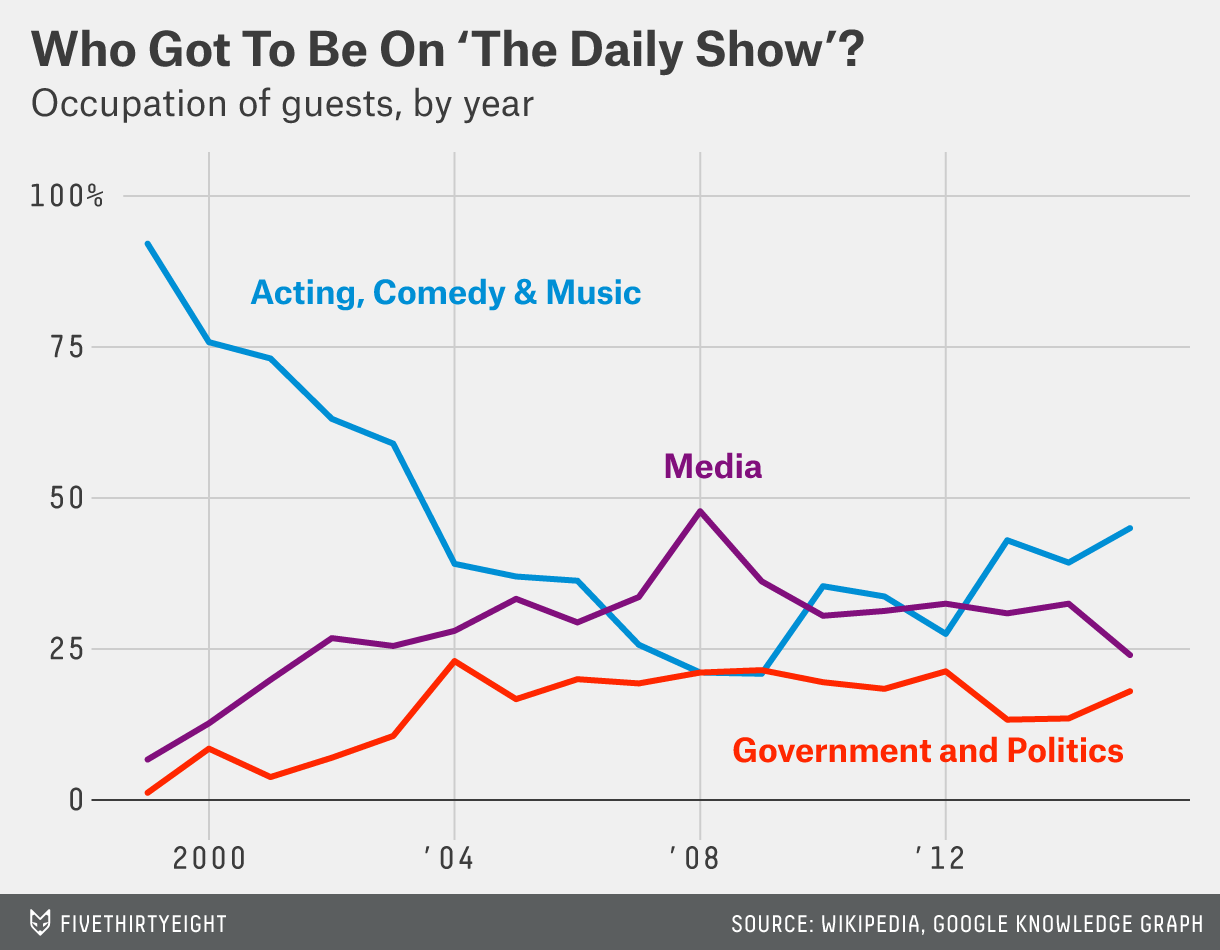

In [3]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend **or** labels for the lines. (But **you don't need each label positioned next to its line or colored like 538.**)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

Text(0.35, 1.1, 'Occupation of guests, by year')

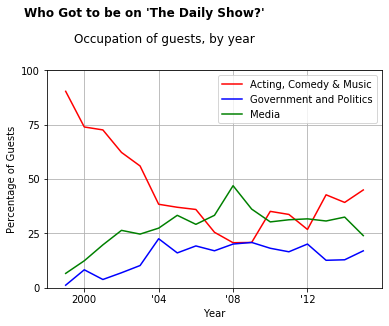

In [23]:
# Your Work Here

import matplotlib.pyplot as plt

# You can have two 'plt' plots together (and let's add some color).
# Now add some labels...
plt.plot(Part_2_data['Acting, Comedy & Music'], 'r', label = 'Acting, Comedy & Music')  # using the columns from Part 1 crosstab, 
plt.plot(Part_2_data['Government and Politics'], 'b', label = 'Government and Politics') # we don't need and CANNOT use the Year column to graph 
plt.plot(Part_2_data['Media'], 'g', label = 'Media' )                   # bc Year data is already incorporated in these occupation types data
plt.legend()

#background grid
plt.grid(True)

#axes
plt.xlabel('Year')
plt.ylabel('Percentage of Guests')

plt.xlim(1998, 2016)
plt.xticks([2000, 2004, 2008, 2012], ['2000', "'04", "'08", "'12"]) # green list on Left is data, brown on R are corresponding labels
plt.ylim(0,1);
plt.yticks([0, .25, .50, .75, 1], ['0', "25", "50", '75', "100"])   # green data list @Left is diff from brown @R bc graph was collapsed illegibly with 1:1 corresponding labels

# Set the title and subtitle
#plt.title("Who Got to be on 'The Daily Show?'")

plt.suptitle("Who Got to be on 'The Daily Show?'", fontsize=12, x=.35,  y=1.1,fontweight='bold')
plt.title("Occupation of guests, by year", fontsize=12, x=.35,  y=1.1)


## How to get a 3 on this Sprint Challenge:

Once you have completed the above making a solid attempt at each section, if you still have time remaining, you can go back and do any of the following to get a score of 3 on the above sections. Remember that everything in this section is **optional** and that we will average your scores between the different sections, so get the easy points first!

Complete any of the following **within** their corresponding sections in the Sprint Challenge (go back up and add these thigns):

### Data Wrangling Section 1

Filter the `cell_phones` dataframe to only include information about the USA and China and then remake the scatterplot. 

### Data Wrangling Section 2

Explain why we are using an "inner" join when we merge these dataframes. 

### Data Wrangling Section 3

Modify the geo column to make the geo codes uppercase instead of lowercase.

### Data Wrangling Section 4

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

### Data Storytelling 

Keep on working on your graph to make it look particularly like the 538 graph by manipulating the graph's background color, the line colors, the x and y axis tick marks/labels, and adding a subtitle. 

If you have already completed everything else, take this as far as you can within the time limit.
